In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sns.set_theme(style="whitegrid")
sns.set_context("notebook", font_scale=1.65, rc={"lines.linewidth": 2.5})

In [3]:
sort_order = {
    "32x16": 1,
    "64x32": 2,
    "128x64": 3,
    "256x128": 4,
    "400x300": 5,
    "512x256": 6,
    "800x600": 7,
    "1600x1200": 8
}

# Gamma

In [34]:
df_gamma_opts = pd.read_csv("../Gamma_experiment.csv", header=None)
df_gamma_opts.columns = ['optimizer','filter','implementation','img','iter','cycles','cycles1']
df_gamma_opts['img'] = df_gamma_opts['img'].apply(lambda x: x.replace("../src/tests/data/imagenes_a_testear/", "").replace("Labyrinth.","").replace(".bmp",""))
df_gamma_opts['order'] = df_gamma_opts['img'].apply(lambda x: sort_order[x])
df_gamma_opts = df_gamma_opts.drop(columns=['cycles1','iter'])
df_gamma_opts['imp_opt'] = df_gamma_opts['implementation'] + "-" + df_gamma_opts['optimizer']
df_gamma_opts = df_gamma_opts.sort_values(by=['order','imp_opt'])

In [35]:
dfg_desc = df_gamma_opts.groupby(['implementation','optimizer','img']).describe().reset_index()

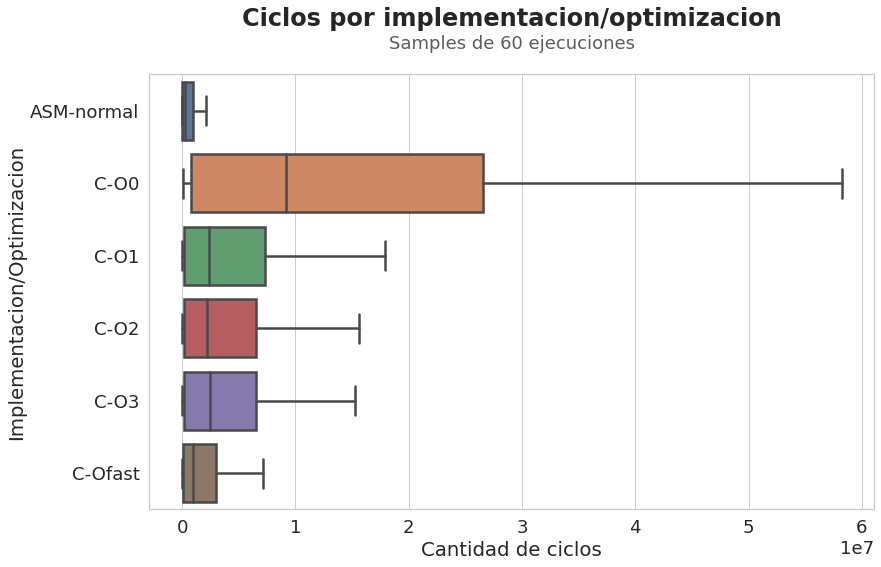

In [36]:
a4_dims = (13, 8)
fig, ax = plt.subplots(figsize=a4_dims)

ax = sns.boxplot(y='imp_opt',
                 x='cycles', 
                 orient="h", 
                 data=df_gamma_opts,
                 ax=ax,
                 showfliers = False)

ax.set(ylabel="Implementacion/Optimizacion", xlabel="Cantidad de ciclos")
ax.text(x=0.5, y=1.1, s='Ciclos por implementacion/optimizacion', fontsize=24, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='Samples de 60 ejecuciones', fontsize=18, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
plt.savefig('../img/bp_gamma_vs_c_opt.png')

---

<Figure size 432x288 with 0 Axes>

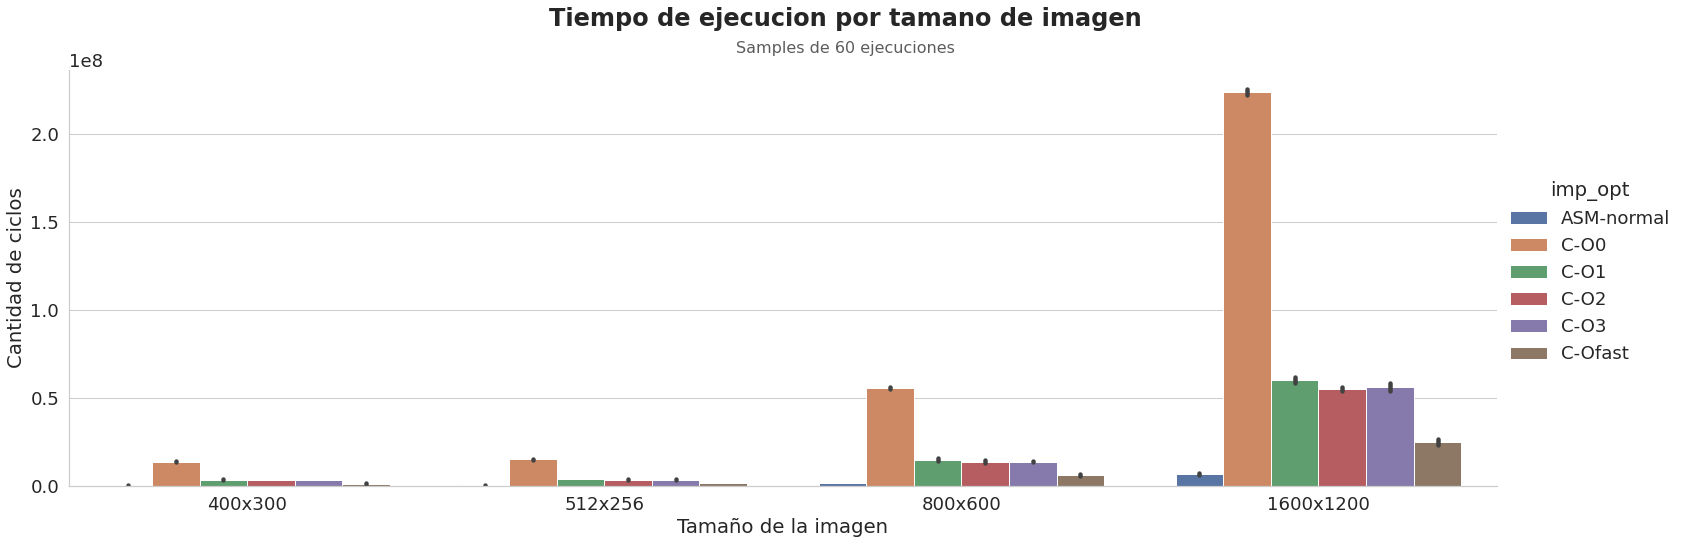

In [105]:
f = plt.figure()

ax = sns.catplot(
    data=df_gamma_opts[df_gamma_opts.img.isin(["400x300","512x256","800x600","1600x1200"])], 
    kind="bar",
    x="img", y="cycles", hue="imp_opt",
    ci='sd',
    height=7,
    aspect=3,
)

ax.set(
    ylabel="Cantidad de ciclos",
    xlabel="Tamaño de la imagen",
)
ax.fig.text(x=0.5, y=1., s='Tiempo de ejecucion por tamano de imagen', fontsize=24, weight='bold', ha='center', va='bottom')
ax.fig.text(x=0.5, y=0.95, s='Samples de 60 ejecuciones', fontsize=16, alpha=0.75, ha='center', va='bottom')
plt.savefig('../img/catplot_gamma_asm_vs_c_imgsize.png')

---

## Gamma Cycle unrolling (for different sizes)

In [99]:
dfun_gamma = pd.read_csv("../Gamma_experiment_normal_unrolling.csv", header=None)
dfuu_gamma = pd.read_csv("../Gamma_experiment_unrolled_unrolling.csv", header=None)
df_unrolled = dfuu_gamma.append(dfun_gamma)
df_unrolled.columns = ['optimizer','filter','implementation','img','iter','cycles','cycles1']
df_unrolled['img'] = df_unrolled['img'].apply(lambda x: x.replace("../src/tests/data/imagenes_a_testear/", "").replace("Labyrinth.","").replace(".bmp",""))
df_unrolled['order'] = df_unrolled['img'].apply(lambda x: sort_order[x])
df_unrolled['imp_opt'] = df_unrolled['implementation'] + "-" + df_unrolled['optimizer']
df_unrolled = df_unrolled.sort_values(by=['order','imp_opt'])
df_unrolled['imp_opt'] = df_unrolled['imp_opt'].apply(lambda x: x.replace("ASM-normal", "normal").replace("_unrolling.","").replace("ASM-unrolled","unrolled"))

In [100]:
df_unrolled

,optimizer,filter,implementation,img,iter,cycles,cycles1,order,imp_opt
180,normal_unrolling,Gamma,ASM,32x16,1,2154,2154.0,1,normal_unrolling
181,normal_unrolling,Gamma,ASM,32x16,1,1835,1835.0,1,normal_unrolling
182,normal_unrolling,Gamma,ASM,32x16,1,1948,1948.0,1,normal_unrolling
183,normal_unrolling,Gamma,ASM,32x16,1,1843,1843.0,1,normal_unrolling
184,normal_unrolling,Gamma,ASM,32x16,1,1917,1917.0,1,normal_unrolling
...,...,...,...,...,...,...,...,...,...
115,unrolled_unrolling,Gamma,ASM,1600x1200,1,7000354,7000354.0,8,unrolled_unrolling
116,unrolled_unrolling,Gamma,ASM,1600x1200,1,6745389,6745389.0,8,unrolled_unrolling
117,unrolled_unrolling,Gamma,ASM,1600x1200,1,6811807,6811807.0,8,unrolled_unrolling
118,unrolled_unrolling,Gamma,ASM,1600x1200,1,6848498,6848498.0,8,unrolled_unrolling


<Figure size 432x288 with 0 Axes>

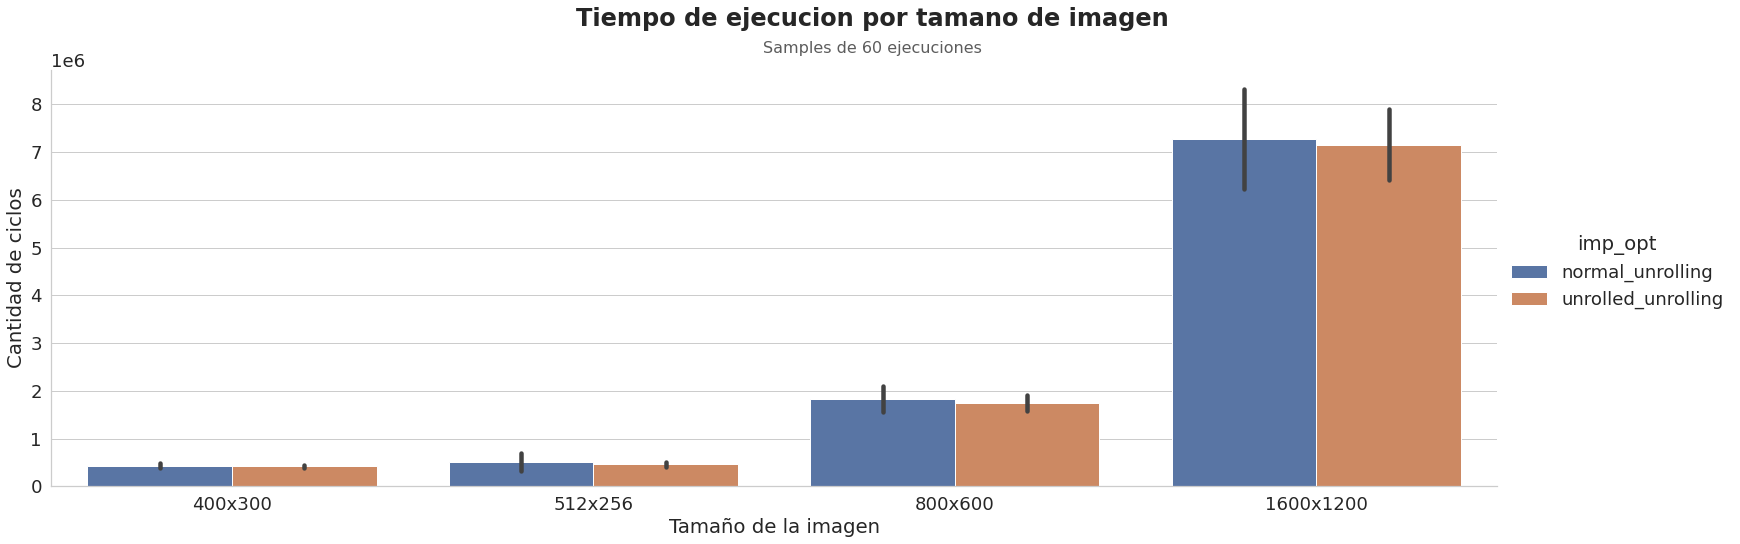

In [109]:
f = plt.figure()

ax = sns.catplot(
    data=df_unrolled[df_unrolled.img.isin(["400x300","512x256","800x600","1600x1200"])], 
    kind="bar",
    x="img", y="cycles", hue="imp_opt",
    ci='sd',
    height=7,
    aspect=3,
)

ax.set(
    ylabel="Cantidad de ciclos",
    xlabel="Tamaño de la imagen",
)

ax.fig.text(x=0.5, y=1., s='Tiempo de ejecucion por tamano de imagen', fontsize=24, weight='bold', ha='center', va='bottom')
ax.fig.text(x=0.5, y=0.95, s='Samples de 60 ejecuciones', fontsize=16, alpha=0.75, ha='center', va='bottom')
plt.savefig('../img/catplot_gamma_unrolling.png')

---
---

# Broken

In [46]:
dfb_time = pd.read_csv('../Broken_experiment.csv', header=None)
dfb_time.columns = ['optimizer','filter','implementation','img','iter','cycles1','cycles']
dfb_time['img'] = dfb_time['img'].apply(lambda x: x.replace("../src/tests/data/imagenes_a_testear/", "").replace("Labyrinth.","").replace(".bmp",""))
dfb_time['order'] = dfb_time['img'].apply(lambda x: sort_order[x])
dfb_time['imp_opt'] = dfb_time['implementation'] + "-" +dfb_time['optimizer']
dfb_time = dfb_time.sort_values(by=['order','imp_opt'])

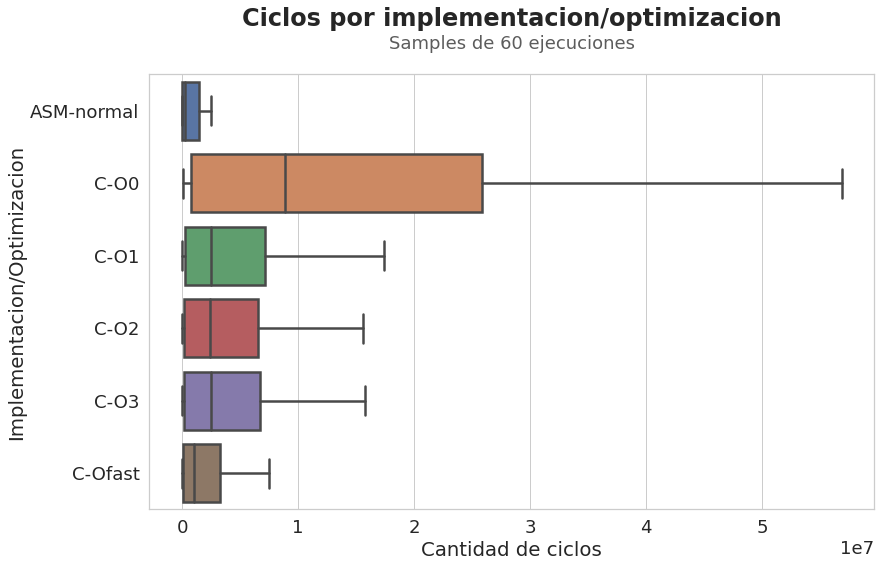

In [62]:
a4_dims = (13, 8)
fig, ax = plt.subplots(figsize=a4_dims)

ax = sns.boxplot(y='imp_opt',
                 x='cycles', 
                 orient="h", 
                 data=dfb_time,
                 ax=ax,
                 showfliers = False)

ax.set(ylabel="Implementacion/Optimizacion", xlabel="Cantidad de ciclos")
ax.text(x=0.5, y=1.1, s='Ciclos por implementacion/optimizacion', fontsize=24, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='Samples de 60 ejecuciones', fontsize=18, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
plt.savefig('../img/bp_broken_vs_c_opt.png')

<Figure size 432x288 with 0 Axes>

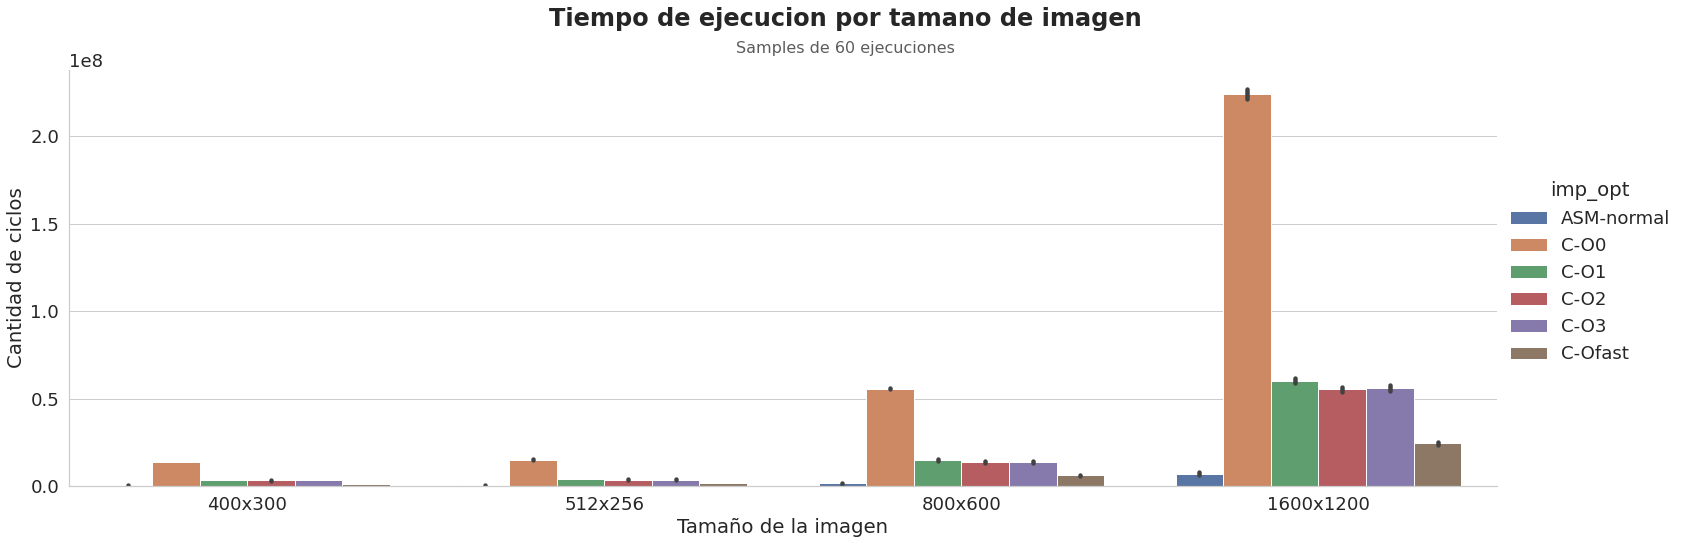

In [107]:
f = plt.figure()

ax = sns.catplot(
    data=dfb_time[dfb_time.img.isin(["400x300","512x256","800x600","1600x1200"])],
    kind="bar",
    x="img", y="cycles", hue="imp_opt",
    ci='sd',
    height=7,
    aspect=3,
)

ax.set(
    ylabel="Cantidad de ciclos",
    xlabel="Tamaño de la imagen",
)

ax.fig.text(x=0.5, y=1., s='Tiempo de ejecucion por tamano de imagen', fontsize=24, weight='bold', ha='center', va='bottom')
ax.fig.text(x=0.5, y=0.95, s='Samples de 60 ejecuciones', fontsize=16, alpha=0.75, ha='center', va='bottom')
plt.savefig('../img/catplot_broken_asm_vs_c_imgsize.png')

---
---

# Max

In [64]:
dfm_data = pd.read_csv('../Max_experiment.csv', header=None)
dfm_data.columns = ['optimizer','filter','implementation','img','iter','cycles1','cycles']
dfm_data['img'] = dfm_data['img'].apply(lambda x: x.replace("../src/tests/data/imagenes_a_testear/", "").replace("Labyrinth.","").replace(".bmp",""))
dfm_data['order'] = dfm_data['img'].apply(lambda x: sort_order[x])
dfm_data = dfm_data.drop(columns=['iter','cycles1'])
dfm_data['imp_opt'] = dfm_data['implementation'] + "-" +dfm_data['optimizer']
dfm_data = dfm_data.sort_values(by=['order','imp_opt'])

In [65]:
dfm_data

,optimizer,filter,implementation,img,cycles,order,imp_opt
180,normal,Gamma,ASM,32x16,2195.0,1,ASM-normal
181,normal,Gamma,ASM,32x16,1897.0,1,ASM-normal
182,normal,Gamma,ASM,32x16,1879.0,1,ASM-normal
183,normal,Gamma,ASM,32x16,1897.0,1,ASM-normal
184,normal,Gamma,ASM,32x16,1965.0,1,ASM-normal
...,...,...,...,...,...,...,...
2035,Ofast,Gamma,C,1600x1200,24946962.0,8,C-Ofast
2036,Ofast,Gamma,C,1600x1200,24544597.0,8,C-Ofast
2037,Ofast,Gamma,C,1600x1200,25086467.0,8,C-Ofast
2038,Ofast,Gamma,C,1600x1200,25847484.0,8,C-Ofast


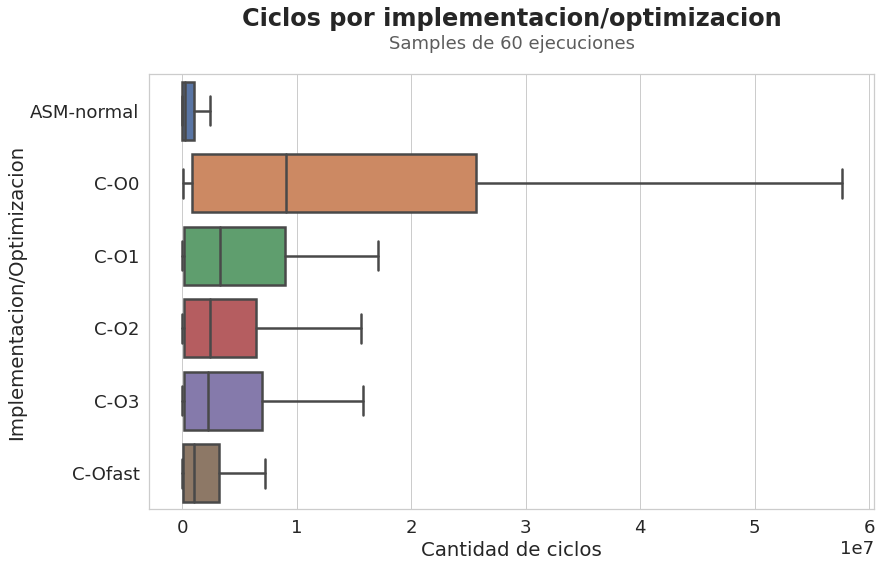

In [104]:
a4_dims = (13, 8)
fig, ax = plt.subplots(figsize=a4_dims)

ax = sns.boxplot(y='imp_opt',
                 x='cycles', 
                 orient="h", 
                 data=dfm_data,
                 ax=ax,
                 showfliers = False)

ax.set(ylabel="Implementacion/Optimizacion", xlabel="Cantidad de ciclos")
ax.text(x=0.5, y=1.1, s='Ciclos por implementacion/optimizacion', fontsize=24, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='Samples de 60 ejecuciones', fontsize=18, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
plt.savefig('../img/bp_max_vs_c_opt.png')

<Figure size 432x288 with 0 Axes>

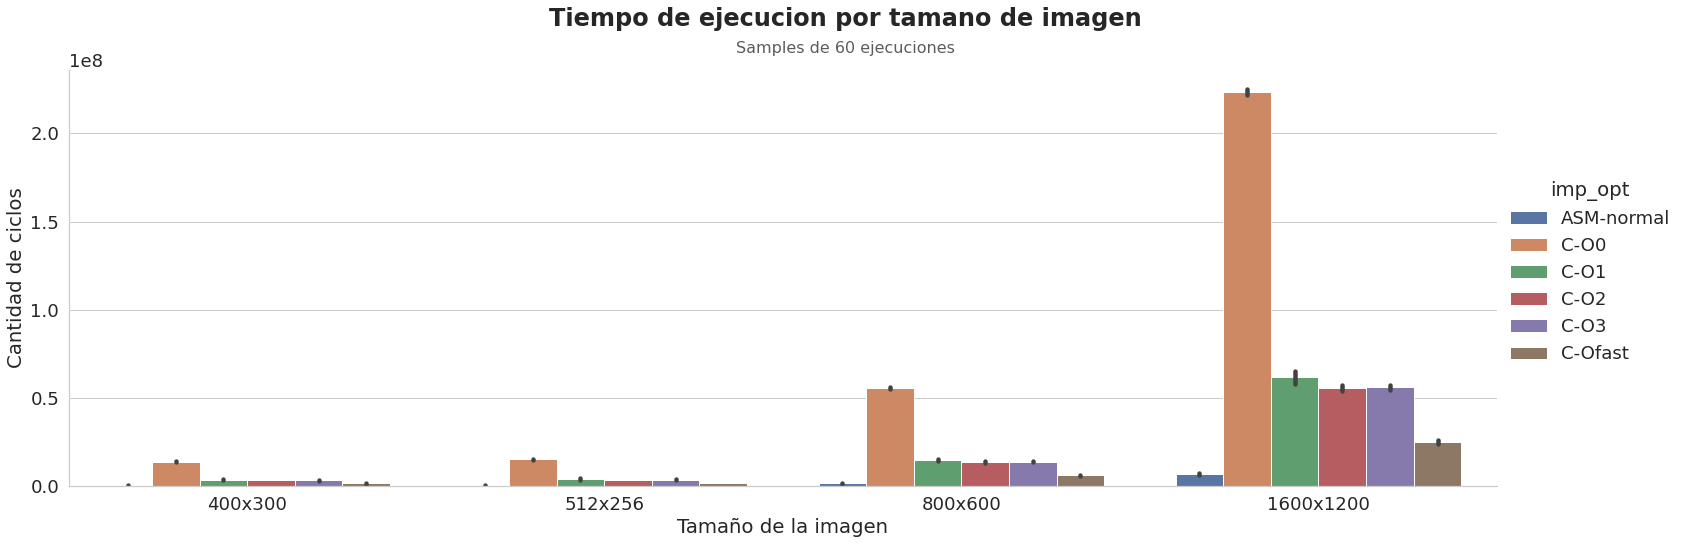

In [108]:
f = plt.figure()

ax = sns.catplot(
    data=dfm_data[dfm_data.img.isin(["400x300","512x256","800x600","1600x1200"])],
    kind="bar",
    x="img", y="cycles", hue="imp_opt",
    ci='sd',
    height=7,
    aspect=3,
)

ax.set(
    ylabel="Cantidad de ciclos",
    xlabel="Tamaño de la imagen",
)

ax.fig.text(x=0.5, y=1., s='Tiempo de ejecucion por tamano de imagen', fontsize=24, weight='bold', ha='center', va='bottom')
ax.fig.text(x=0.5, y=0.95, s='Samples de 60 ejecuciones', fontsize=16, alpha=0.75, ha='center', va='bottom')
plt.savefig('../img/catplot_max_asm_vs_c_imgsize.png')